# stock price
https://www.analyticsvidhya.com/blog/2021/07/stock-prices-analysis-with-python/

| Column        | Meaning                                              |
| ------------- | ---------------------------------------------------- |
| **Adj Close** | Adjusted Close price — accounts for splits/dividends |
| **Close**     | The price at which the stock closed that day         |
| **High**      | Highest trading price of the day                     |
| **Low**       | Lowest trading price of the day                      |
| **Open**      | Opening price of the stock                           |
| **Volume**    | Number of shares traded                              |


In [128]:
# install necesary packages
# !pip install yfinance

In [129]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import yfinance as yf

%matplotlib inline

file_tcs   = 'TCS_NS_2016_2021.csv'
file_infy  = 'INFY_NS_2016_2021.csv'
file_wipro = 'WIPRO_NS_2016_2021.csv'

In [130]:
# # SKIP Lets download the data and save it in  csv file
# start = '2016-01-01'
# end = '2021-11-30'

# # start = '2016-01-01'
# # end = '2019-11-30'


# # start = "2014-01-01"
# # end   = '2019-1-01'

# # Use the NSE suffix '.NS' for Indian tickers
# tcs   = yf.download('TCS.NS', start=start, end=end, auto_adjust=False)
# infy  = yf.download('INFY.NS', start=start, end=end, auto_adjust=False)
# wipro = yf.download('WIPRO.NS', start=start, end=end, auto_adjust=False)

# # Save to CSV
# tcs.index.name = 'Date'
# infy.index.name = 'Date'
# wipro.index.name = 'Date'

# tcs.to_csv(file_tcs)
# infy.to_csv(file_infy)
# wipro.to_csv(file_wipro)

In [131]:
tcs = pd.read_csv(file_tcs, header=[0, 1], index_col=0, parse_dates=True)
infy = pd.read_csv(file_infy, header=[0, 1], index_col=0, parse_dates=True)
wipro = pd.read_csv(file_wipro, header=[0, 1], index_col=0, parse_dates=True)

In [132]:
print(tcs.info())       # Data types and missing values
print(tcs.describe())   # Summary statistics

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1458 entries, 2016-01-01 to 2021-11-29
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   (Adj Close, TCS.NS)  1458 non-null   float64
 1   (Close, TCS.NS)      1458 non-null   float64
 2   (High, TCS.NS)       1458 non-null   float64
 3   (Low, TCS.NS)        1458 non-null   float64
 4   (Open, TCS.NS)       1458 non-null   float64
 5   (Volume, TCS.NS)     1458 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 79.7 KB
None
Price     Adj Close        Close         High          Low         Open  \
Ticker       TCS.NS       TCS.NS       TCS.NS       TCS.NS       TCS.NS   
count   1458.000000  1458.000000  1458.000000  1458.000000  1458.000000   
mean    1759.721264  1966.500842  1988.133124  1945.343437  1967.239761   
std      714.980879   731.825093   739.392949   725.321615   732.683959   
min      891.643250  1050.574951  1070.000000

In [133]:
print(f"type(tcs): {type(tcs)}")
print("#################")
print(f"tcs.columns:\n{tcs.columns}")
print("#################")
print(f"tcs.columns.names:\n{tcs.columns.names}")
print("#################")
print(f"tcs.columns.get_level_values(0): {tcs.columns.get_level_values(0)}")
print(f"tcs.columns.get_level_values(1): {tcs.columns.get_level_values(1)}")
print("#################")
print(f"tcs.head(7):\n{tcs.head(7)}")


type(tcs): <class 'pandas.core.frame.DataFrame'>
#################
tcs.columns:
MultiIndex([('Adj Close', 'TCS.NS'),
            (    'Close', 'TCS.NS'),
            (     'High', 'TCS.NS'),
            (      'Low', 'TCS.NS'),
            (     'Open', 'TCS.NS'),
            (   'Volume', 'TCS.NS')],
           names=['Price', 'Ticker'])
#################
tcs.columns.names:
['Price', 'Ticker']
#################
tcs.columns.get_level_values(0): Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')
tcs.columns.get_level_values(1): Index(['TCS.NS', 'TCS.NS', 'TCS.NS', 'TCS.NS', 'TCS.NS', 'TCS.NS'], dtype='object', name='Ticker')
#################
tcs.head(7):
Price         Adj Close        Close         High          Low         Open  \
Ticker           TCS.NS       TCS.NS       TCS.NS       TCS.NS       TCS.NS   
Date                                                                          
2016-01-01  1007.125916  1208.199951  1219.500000  1206.12

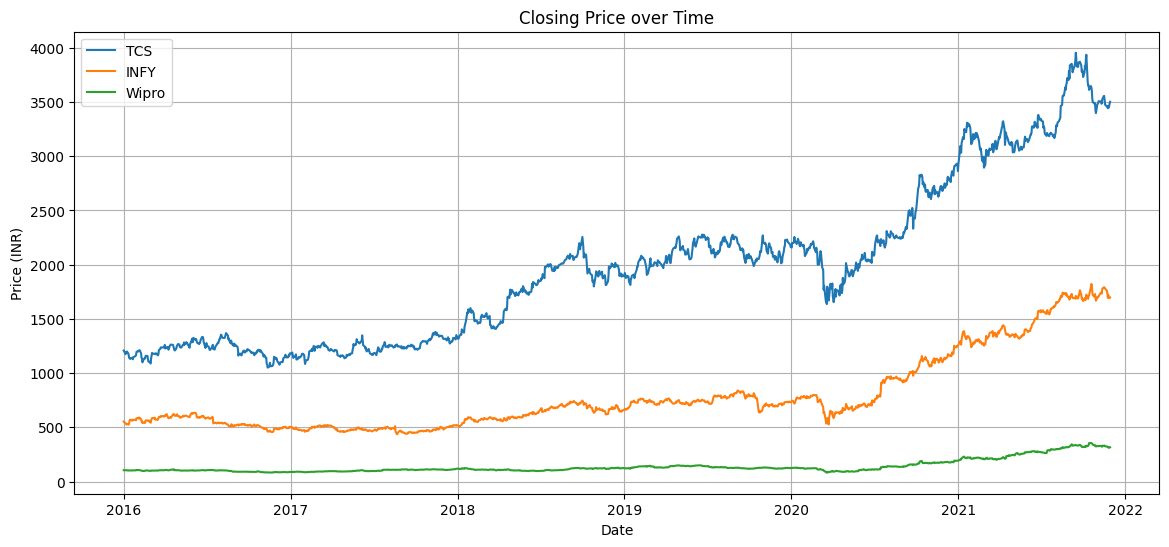

In [134]:
# lets plot Closing Price over Time

plt.figure(figsize=(14,6))

plt.plot(tcs['Close'], label='TCS')
plt.plot(infy['Close'], label='INFY')
plt.plot(wipro['Close'], label='Wipro')

plt.title('Closing Price over Time')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)

plt.show()

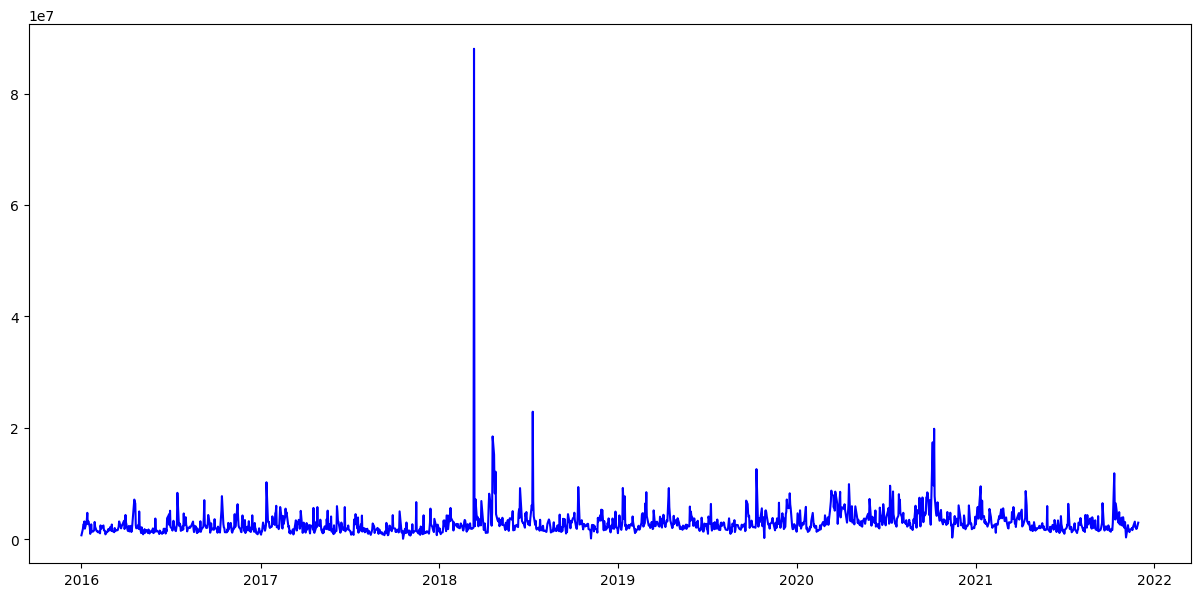

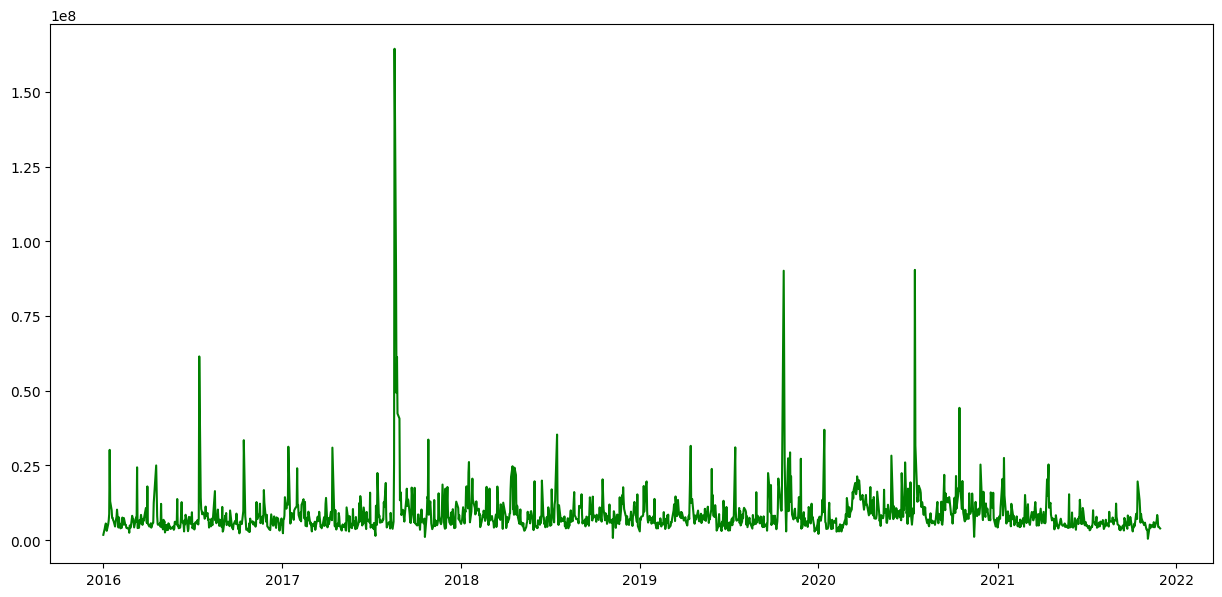

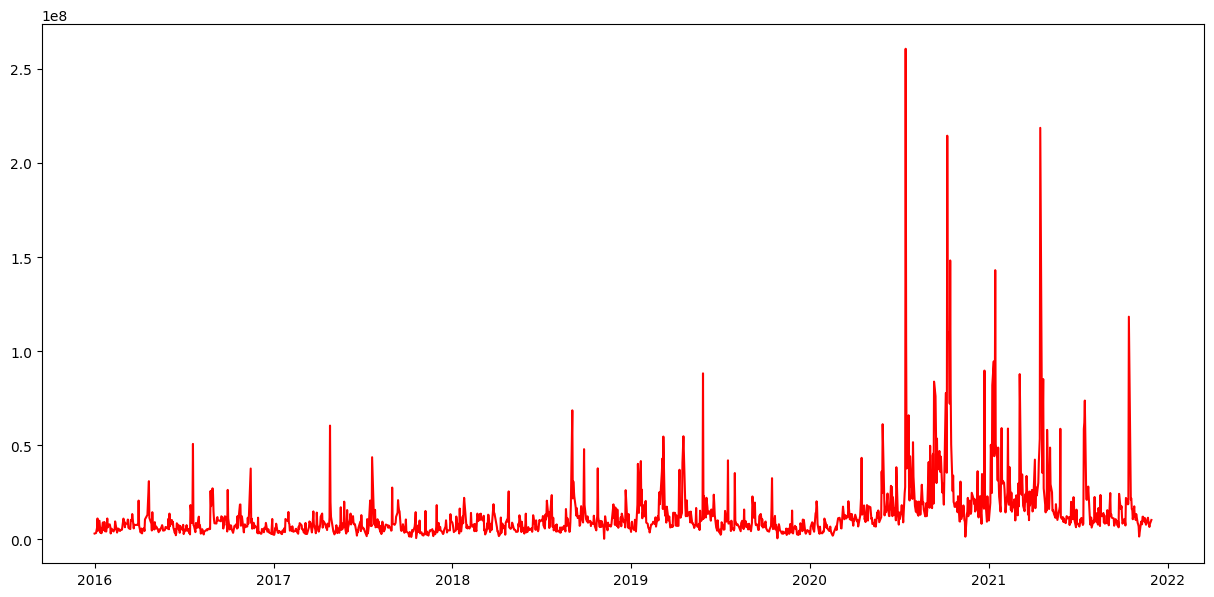

In [135]:
# Plot Volume of Stock Traded. Do not do overlapping...
size = (15, 7)

plt.figure(figsize=size)
plt.plot(tcs.index, tcs['Volume'], label='TCS', color='blue')
plt.show()

plt.figure(figsize=size)
plt.plot(infy.index, infy['Volume'], label='Infosys', color='green')
plt.show()

plt.figure(figsize=size)
plt.plot(wipro.index, wipro['Volume'], label='Wipro', color='red')
plt.show()

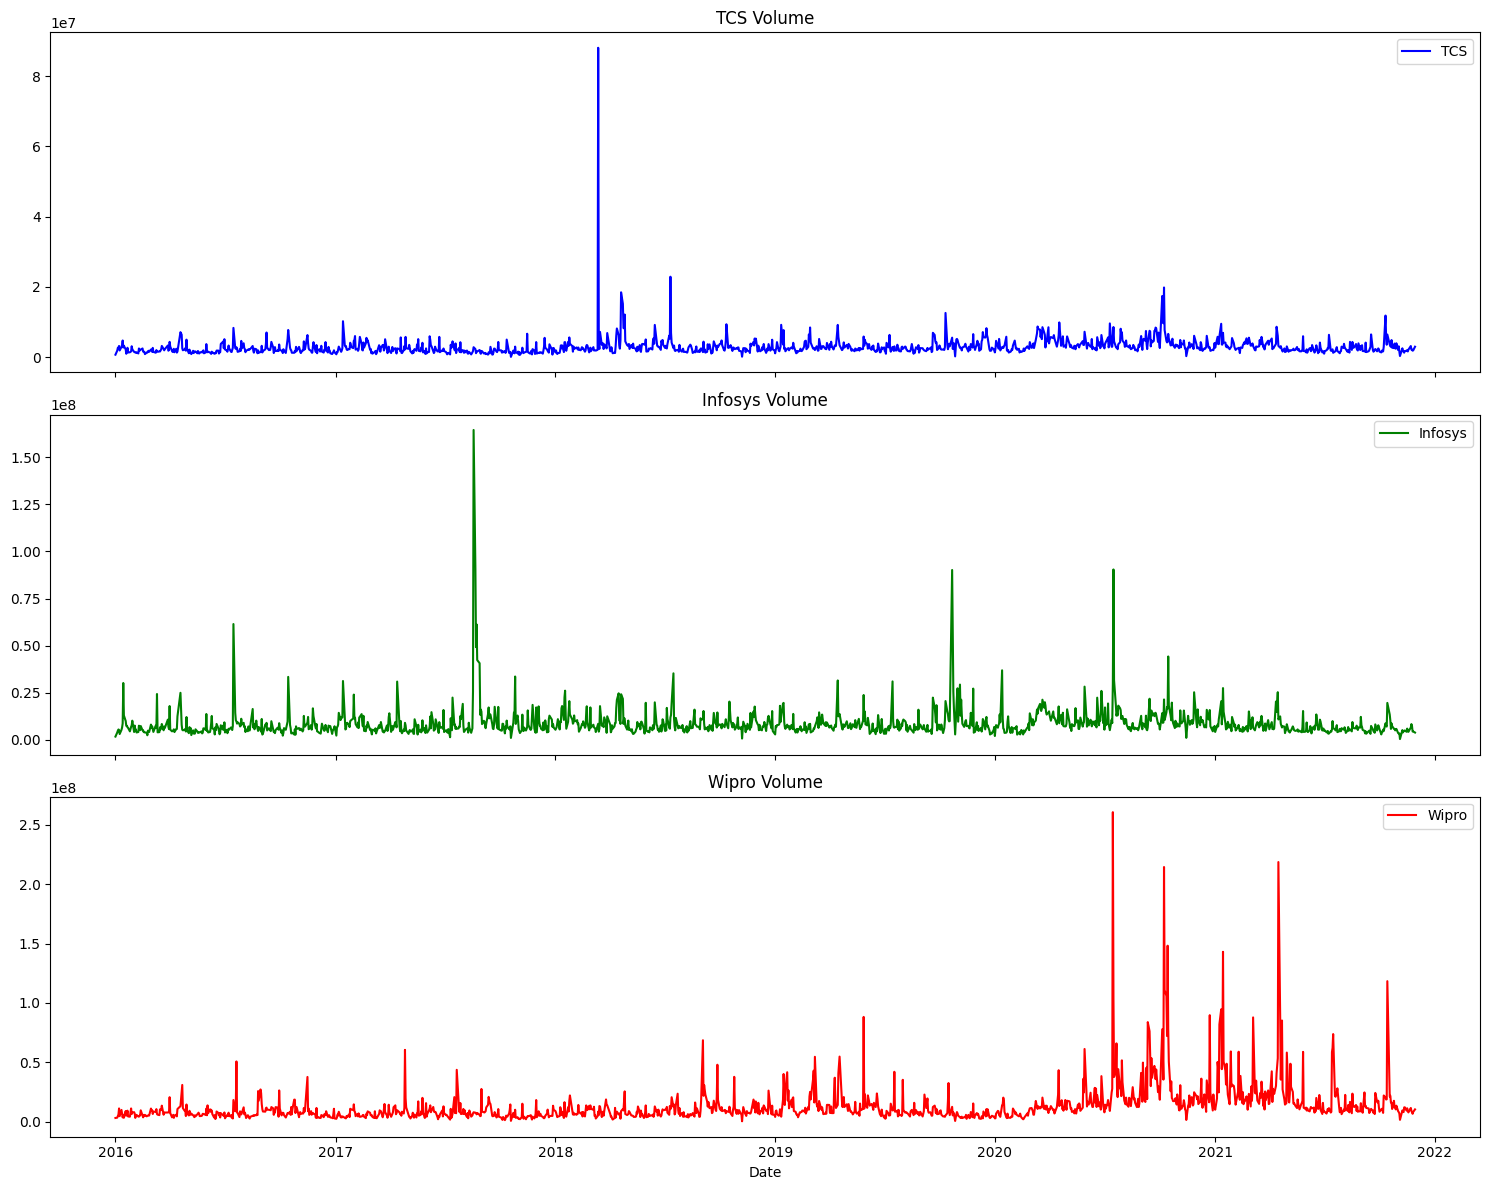

In [136]:
# lets plot above seperately
# Create subplots (3 rows, 1 column)
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 12), sharex=True)

# Plot each on a separate subplot
axes[0].plot(tcs.index, tcs['Volume'], label='TCS', color='blue')
axes[0].set_title('TCS Volume')
axes[0].legend()

axes[1].plot(infy.index, infy['Volume'], label='Infosys', color='green')
axes[1].set_title('Infosys Volume')
axes[1].legend()

axes[2].plot(wipro.index, wipro['Volume'], label='Wipro', color='red')
axes[2].set_title('Wipro Volume')
axes[2].legend()

# Shared X-label and layout adjustments
plt.xlabel('Date')
plt.tight_layout()
plt.show()

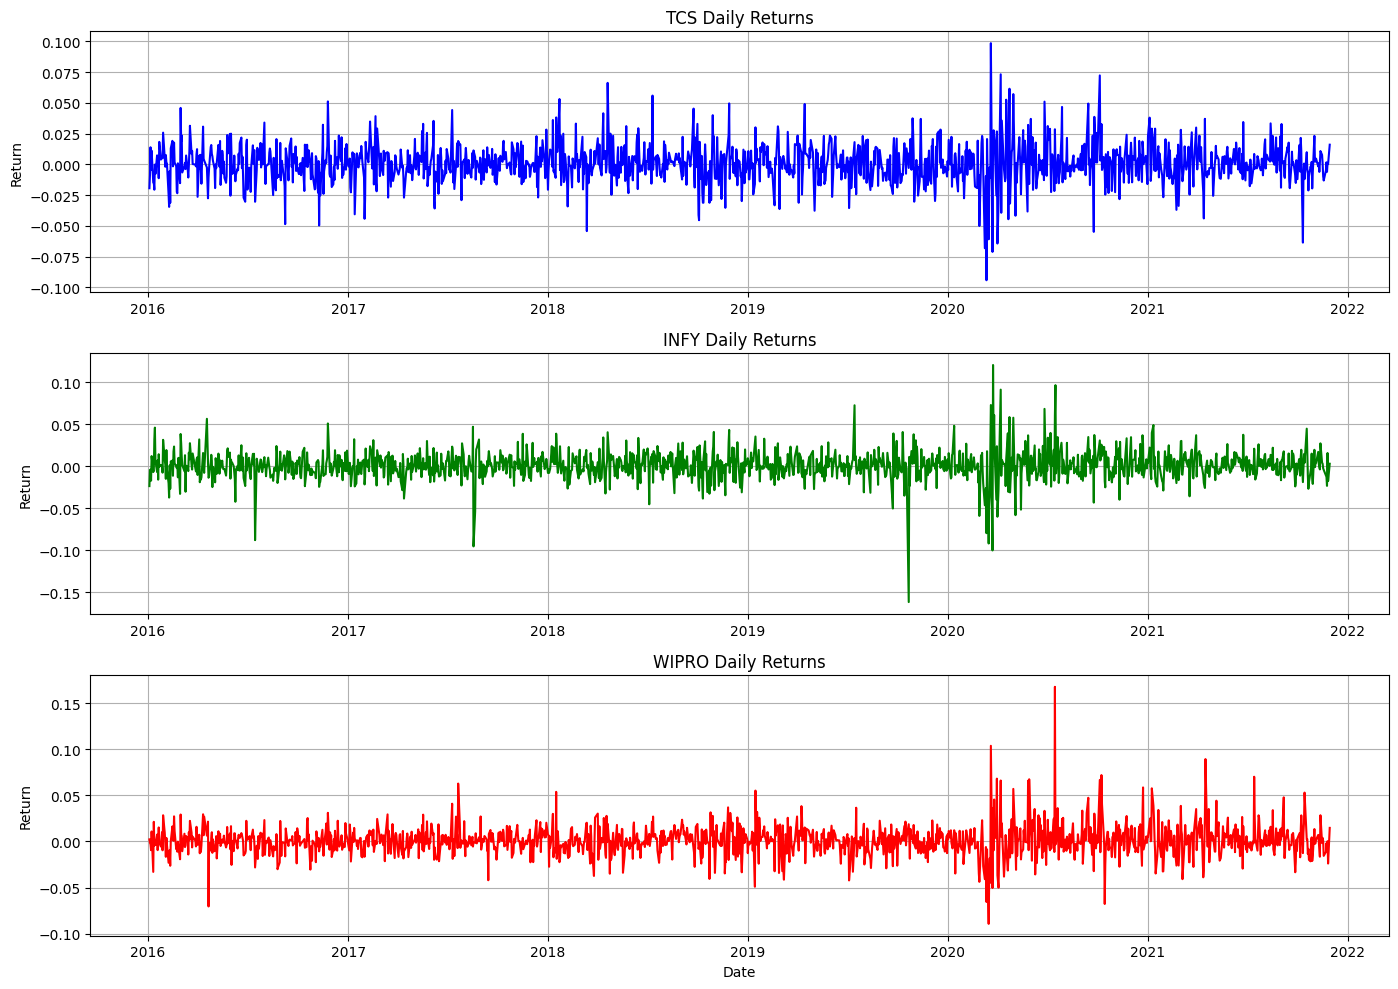

In [137]:
# Calculate and Plot Daily Returns: plot them seperatley
# if the price changes from ₹100 to ₹103, return is 0.03 or 3%


# Calculate daily returns
# if the close price changes from ₹100 to ₹103, return is 0.03 or 3%
tcs['Returns'] = tcs['Close'].pct_change()
infy['Returns'] = infy['Close'].pct_change()
wipro['Returns'] = wipro['Close'].pct_change()

# Plotting in subplots
plt.figure(figsize=(14, 10))

# TCS
plt.subplot(3, 1, 1)
plt.plot(tcs['Returns'], label='TCS', color='blue')
plt.title('TCS Daily Returns')
plt.ylabel('Return')
plt.grid(True)

# INFY
plt.subplot(3, 1, 2)
plt.plot(infy['Returns'], label='INFY', color='green')
plt.title('INFY Daily Returns')
plt.ylabel('Return')
plt.grid(True)

# WIPRO
plt.subplot(3, 1, 3)
plt.plot(wipro['Returns'], label='WIPRO', color='red')
plt.title('WIPRO Daily Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.grid(True)

plt.tight_layout()
plt.show()


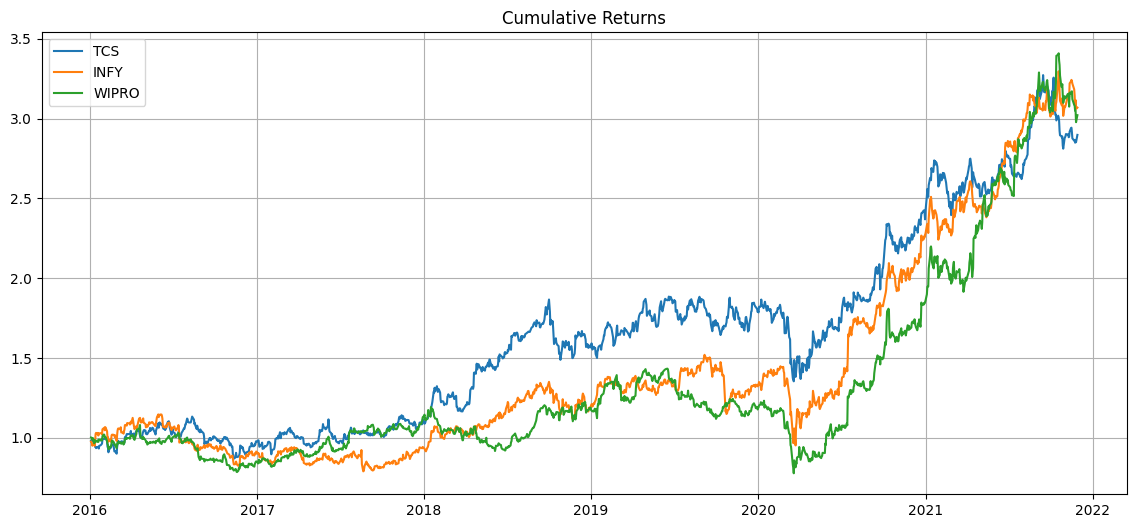

In [138]:
# Cumulative Returns

# (1 + tcs['Returns'])
# We convert percentage return into a growth factor:
# 3% return → 1 + 0.03 = 1.03
# -2% return → 1 - 0.02 = 0.98
# This represents the multiplicative effect on capital.

#  .cumprod()
# We compute the cumulative product of the growth factors:
# (1 + r1) * (1 + r2) * (1 + r3) * ... * (1 + rn)
# This simulates compounding returns day after day, starting with ₹1.

# Example:
# Say, returns are:
# return Day 1:  +5%  → 1.05  
# return Day 2:  -2%  → 0.98  
# return Day 3:  +1%  → 1.01  

# Then:
# Cumulative = [1.05, 1.05*0.98, 1.05*0.98*1.01]
#            ≈ [1.05, 1.029, 1.039]
# So, after 3 days, your ₹1 becomes ₹1.039 — a 3.9% total return.


tcs['Cumulative'] = (1 + tcs['Returns']).cumprod()
infy['Cumulative'] = (1 + infy['Returns']).cumprod()
wipro['Cumulative'] = (1 + wipro['Returns']).cumprod()

plt.figure(figsize=(14,6))
plt.plot(tcs['Cumulative'], label='TCS')
plt.plot(infy['Cumulative'], label='INFY')
plt.plot(wipro['Cumulative'], label='WIPRO')
plt.title("Cumulative Returns")
plt.legend()
plt.grid(True)
plt.show()


<Figure size 1400x600 with 0 Axes>

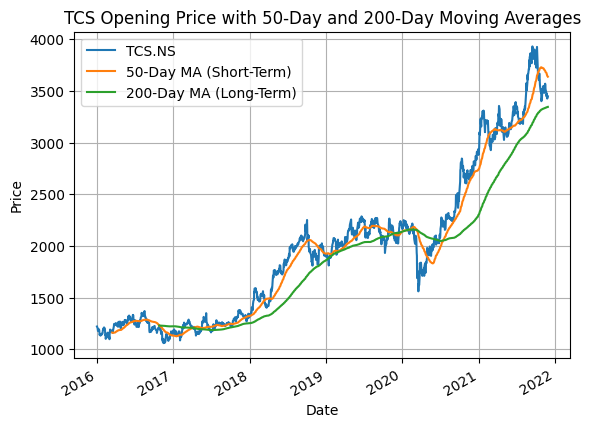

In [147]:
# Drop columns if they already exist
for col in ['MA50', 'MA200']:
    if col in tcs.columns:
        tcs.drop(columns=col, inplace=True)

# Moving Averages
tcs['MA50'] = tcs['Open'].rolling(50).mean()   # Short-Term Trend
tcs['MA200'] = tcs['Open'].rolling(200).mean() # Long-Term Trend

# Plotting with labels
plt.figure(figsize=(14, 6))
tcs['Open'].plot(label='TCS Open Price', )
tcs['MA50'].plot(label='50-Day MA (Short-Term)',)
tcs['MA200'].plot(label='200-Day MA (Long-Term)', )

# Enhancements
plt.title('TCS Opening Price with 50-Day and 200-Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


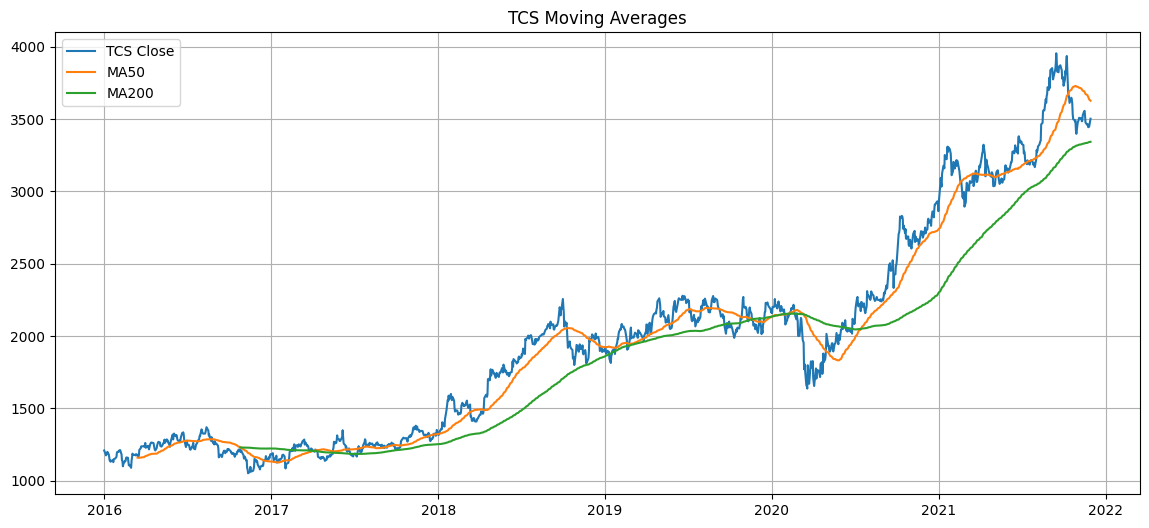

In [144]:
# Moving Averages (Trend Analysis)
# TODO plot them seperately

# Drop columns if they already exist
for col in ['MA50', 'MA200']:
    if col in tcs.columns:
        tcs.drop(columns=col, inplace=True)


tcs['MA50'] = tcs['Close'].rolling(window=50).mean()
tcs['MA200'] = tcs['Close'].rolling(window=200).mean()

plt.figure(figsize=(14,6))
plt.plot(tcs['Close'], label='TCS Close')
plt.plot(tcs['MA50'], label='MA50')
plt.plot(tcs['MA200'], label='MA200')
plt.title("TCS Moving Averages")
plt.legend()
plt.grid(True)
plt.show()


array([[<Axes: xlabel='TCSOpen', ylabel='TCSOpen'>,
        <Axes: xlabel='InfosysOpen', ylabel='TCSOpen'>,
        <Axes: xlabel='WiproOpen', ylabel='TCSOpen'>],
       [<Axes: xlabel='TCSOpen', ylabel='InfosysOpen'>,
        <Axes: xlabel='InfosysOpen', ylabel='InfosysOpen'>,
        <Axes: xlabel='WiproOpen', ylabel='InfosysOpen'>],
       [<Axes: xlabel='TCSOpen', ylabel='WiproOpen'>,
        <Axes: xlabel='InfosysOpen', ylabel='WiproOpen'>,
        <Axes: xlabel='WiproOpen', ylabel='WiproOpen'>]], dtype=object)

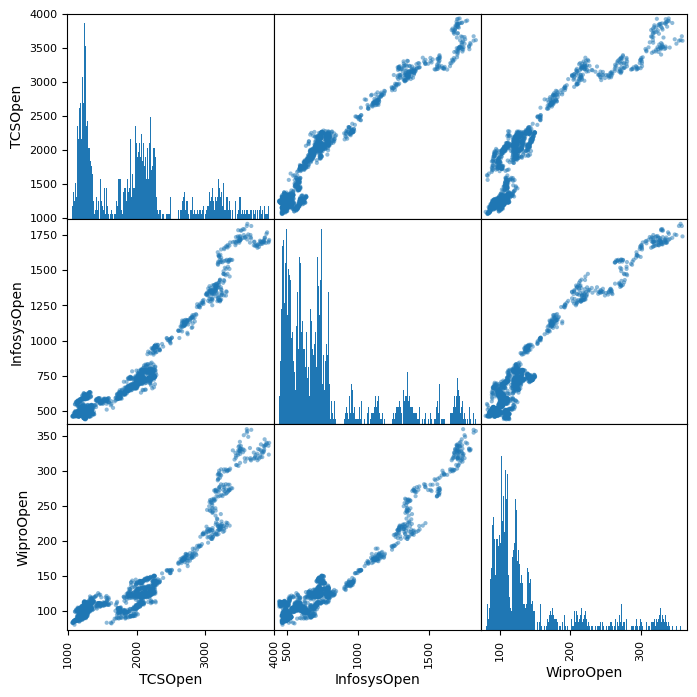

In [140]:
data = pd.concat([tcs['Open'],infy['Open'],wipro['Open']],axis = 1)
data.columns = ['TCSOpen','InfosysOpen','WiproOpen']
scatter_matrix(data, figsize = (8,8), hist_kwds= {'bins':250})

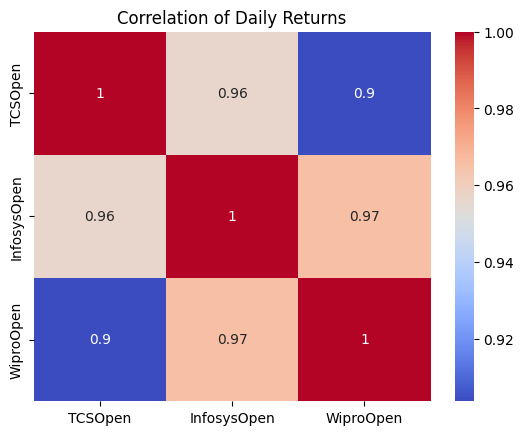

In [141]:
# now lets at the corr coef of open price on heatmap
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation of Daily Returns")
plt.show()


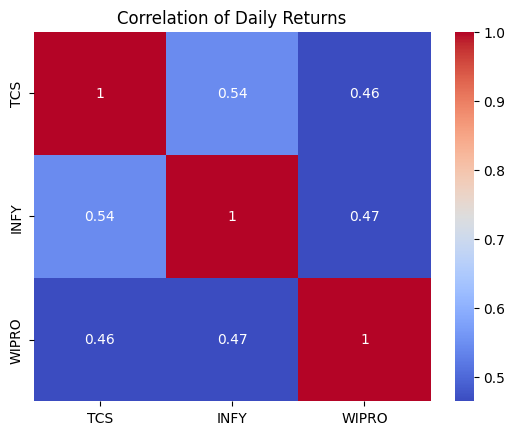

In [142]:
returns_df = pd.DataFrame({
    'TCS': tcs['Returns'],
    'INFY': infy['Returns'],
    'WIPRO': wipro['Returns']
})

sns.heatmap(returns_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation of Daily Returns")
plt.show()
